 ###  libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import models
from keras import layers

Using TensorFlow backend.


### Binary representation

In [104]:
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

[0. 1. 0. ... 0. 0. 0.]
20000
1.0
Train on 8083 samples, validate on 899 samples
Epoch 1/3
8083/8083 [==============================] - 159s 20ms/step - loss: 1.2719 - accuracy: 0.7251 - val_loss: 0.9443 - val_accuracy: 0.7976
Epoch 2/3
8083/8083 [==============================] - 109s 13ms/step - loss: 0.4739 - accuracy: 0.8945 - val_loss: 0.8820 - val_accuracy: 0.8131
Epoch 3/3
8083/8083 [==============================] - 99s 12ms/step - loss: 0.2600 - accuracy: 0.9440 - val_loss: 0.9249 - val_accuracy: 0.8065
Test loss: 0.9456923884784973
Test accuracy: 0.8040961623191833


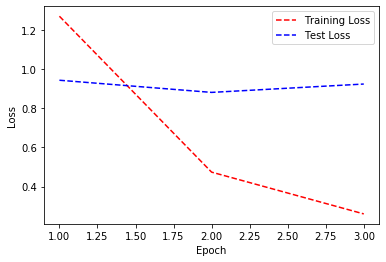

In [139]:
# load reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

no_features = max(y_train) + 1

max_words = 20000

# one-hot encoding
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train = keras.utils.to_categorical(y_train, no_features)
y_test = keras.utils.to_categorical(y_test, no_features)

print(x_train[0])
print(len(x_train[0]))
print(max(x_train[0]))

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train,  # features
                    y_train,  # target
                    batch_size=32,   # number of observations per batch
                    epochs=3,   # number of epochs
                    verbose=1,  # output
                    validation_split=0.1)   # test data

print('Test loss:', score[0])
print('Test accuracy:', score[1])


# get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# count for the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# visualize the loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


### Count representation

[0. 1. 0. ... 0. 0. 0.]
20000
6.0
Train on 8083 samples, validate on 899 samples
Epoch 1/3
8083/8083 [==============================] - 99s 12ms/step - loss: 1.2896 - accuracy: 0.7398 - val_loss: 0.9580 - val_accuracy: 0.8087
Epoch 2/3
8083/8083 [==============================] - 95s 12ms/step - loss: 0.5301 - accuracy: 0.8846 - val_loss: 0.8517 - val_accuracy: 0.8265
Epoch 3/3
2246/2246 [==============================] - 2s 834us/step
Test loss: 0.941346669133391
Test accuracy: 0.8054319024085999


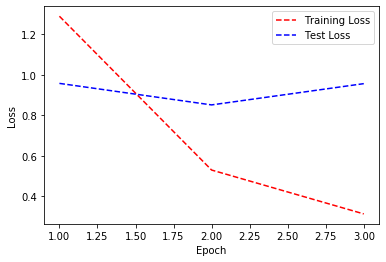

In [140]:
# load reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

no_features = max(y_train) + 1

max_words = 20000

tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='count')
x_test = tokenizer.sequences_to_matrix(x_test, mode='count')

y_train = keras.utils.to_categorical(y_train, no_features)
y_test = keras.utils.to_categorical(y_test, no_features)

print(x_train[0])
print(len(x_train[0]))
print(max(x_train[0]))

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train,  # features
                    y_train,  # target
                    batch_size=32,   # number of observations per batch
                    epochs=3,   # number of epochs
                    verbose=1,  # output
                    validation_split=0.1)   # test data
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


# get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# count for the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# visualize the loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()